<a href="https://colab.research.google.com/github/tejalvs/RobotOdometryMining/blob/main/Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import plotly.express as px
from sklearn.model_selection import train_test_split 

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
roomba_data=pd.read_csv('/content/drive/MyDrive/RoombaData_XY_cleaned.csv')
mobile_robot_data=pd.read_csv('/content/drive/MyDrive/MobileRobot_XY_cleaned.csv')
roomba_data=roomba_data.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
mobile_robot_data=mobile_robot_data.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)


In [7]:
mobile_robot_data.columns

Index(['X_ODOM', 'Y_ODOM', 'Theta', 'Velocity', 'Odometry_Distance', 'X_GR',
       'Y_GR', 'Ground_Truth_Distance', 'Surface_Type', 'Time_To_Travel',
       'Cumulative_Time', 'Cumulative_Theta', 'Series_ID',
       'Distance_travelled_error', 'X_error', 'Y_error', 'timestamp'],
      dtype='object')

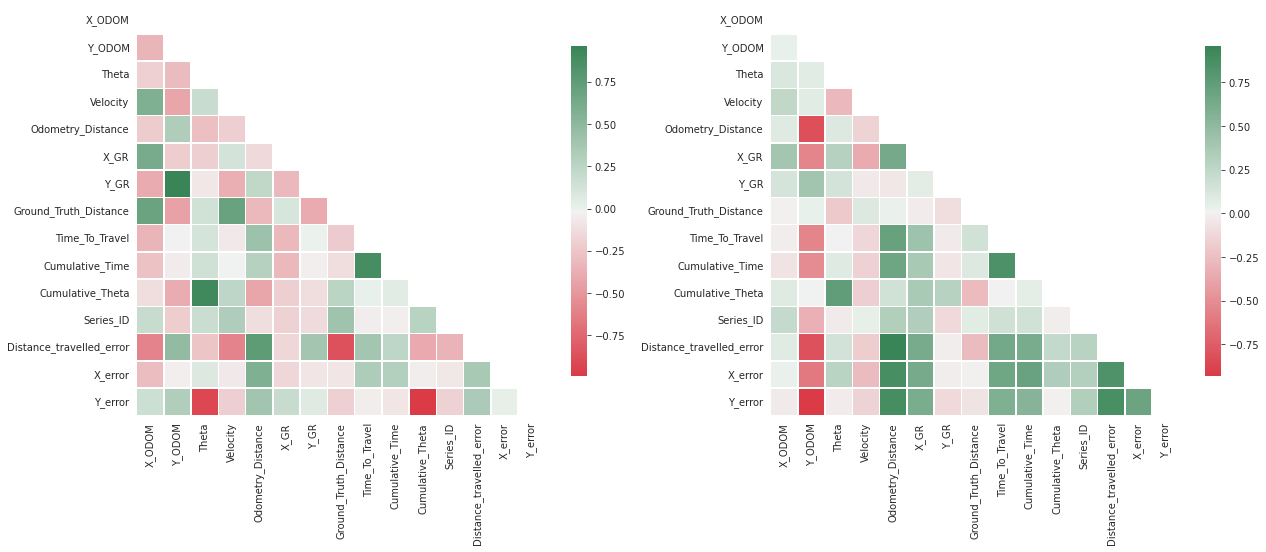

In [8]:
corr1 = roomba_data.corr()
corr2 = mobile_robot_data.corr()
# visualise the data with seaborn
mask = np.triu(np.ones_like(corr1, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(1,2,figsize=(18, 10))
cmap = sns.diverging_palette(10, 500, as_cmap=True)
sns.heatmap(corr1, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax[0])
mask = np.triu(np.ones_like(corr2, dtype=np.bool))
sns.heatmap(corr2, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax[1])
f.tight_layout()

In [9]:
label=[]
for i in roomba_data['Distance_travelled_error']:
  if i>0.01:
    label.append(1)
  else:
    label.append(0)
roomba_data['Label']=label
label=[]
for i in mobile_robot_data['Distance_travelled_error']:
  if i>0.01:
    label.append(1)
  else:
    label.append(0)
mobile_robot_data['Label']=label
roomba_data

,X_ODOM,Y_ODOM,Theta,Velocity,Odometry_Distance,X_GR,Y_GR,Ground_Truth_Distance,Surface_Type,Time_To_Travel,Cumulative_Time,Cumulative_Theta,Series_ID,Distance_travelled_error,X_error,Y_error,timestamp,Label
0,-0.330820,0.001408,5.687978e-03,-0.1,0.000000,-0.329817,0.001415,0.001278,CARPET,0.299245,0.299245,-1.192579e+00,1.0,0.001278,0.001003,0.000007,2021-10-27 15:46:07.640,0
1,-0.330820,0.001408,5.687978e-03,-0.1,0.000000,-0.330319,0.001411,0.000000,CARPET,0.315252,0.614497,-1.186891e+00,1.0,0.000000,0.000502,0.000004,2021-10-27 15:46:07.672,0
2,-0.331043,0.001406,3.791985e-03,-0.1,0.000223,-0.330152,0.001413,0.001278,CARPET,0.331526,0.946024,-1.183099e+00,1.0,0.001055,0.000891,0.000007,2021-10-27 15:46:07.719,0
3,-0.332380,0.001401,3.791985e-03,-0.1,0.001559,-0.329316,0.001419,0.005112,CARPET,0.348310,1.294334,-1.179307e+00,1.0,0.003552,0.003064,0.000018,2021-10-27 15:46:07.750,0
4,-0.334830,0.001396,5.687978e-03,-0.1,0.004010,-0.328012,0.001428,0.010223,CARPET,0.364525,1.658858,-1.173619e+00,1.0,0.006213,0.006818,0.000032,2021-10-27 15:46:07.782,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,-1.738000,-0.002000,0.000000e+00,0.5,0.001000,-1.440174,-0.000691,-0.000138,CARPET,2.110419,102.113155,-5.633375e-15,20.0,0.001138,0.297826,0.001309,2021-10-28 15:21:21.742,0
3811,-1.738000,-0.002000,0.000000e+00,0.5,0.001000,-1.443409,-0.000695,0.001650,CARPET,2.110359,104.223514,-5.633375e-15,20.0,0.000650,0.294591,0.001305,2021-10-28 15:21:21.841,0
3812,-1.738000,-0.002000,-2.449294e-16,0.5,0.001000,-1.448131,-0.000700,0.001467,CARPET,2.111824,106.335338,-5.878305e-15,20.0,0.000467,0.289869,0.001300,2021-10-28 15:21:21.941,0
3813,-1.738000,-0.002000,0.000000e+00,0.5,0.001000,-1.452708,-0.000704,0.000183,CARPET,2.114523,108.449860,-5.878305e-15,20.0,0.000817,0.285292,0.001296,2021-10-28 15:21:22.038,0


In [10]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import Lasso as Lasso_Reg
from statsmodels.regression.linear_model import OLS
import sklearn.preprocessing as Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import itertools as it
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy as sp
from itertools import combinations
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [38]:
roomba_df=roomba_data[['Velocity','Cumulative_Time','Cumulative_Theta','Time_To_Travel','X_error', 'Y_error','Label']]
mobile_robot_df=mobile_robot_data[['Velocity','Cumulative_Time','Cumulative_Theta','Time_To_Travel','Distance_travelled_error','X_error', 'Y_error','Label']]

In [39]:
X = roomba_df.iloc[:, :-1]
Y = roomba_df.iloc[:, -1]


In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

print("Shape of train data of X = % s and Y = % s "%(x_train.shape, y_train.shape)) 
print("Shape of test data of X = % s and Y = % s"%(x_test.shape, y_test.shape)) 


Shape of train data of X = (2861, 6) and Y = (2861,) 
Shape of test data of X = (954, 6) and Y = (954,)


In [41]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(x_train, y_train)
y_pred = lreg.predict(x_test)

In [42]:
#Calculating the Mean-Squared Error(MSE):
mse = np.mean((y_pred - y_test)**2)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.08850049487311842


In [43]:
lreg_coef = pd.DataFrame()
lreg_coef['Columns']= x_train.columns
lreg_coef['Coefficient Estimate']= pd.Series(lreg.coef_)
print(lreg_coef)

            Columns  Coefficient Estimate
0          Velocity             -0.130423
1   Cumulative_Time             -0.000169
2  Cumulative_Theta              0.000971
3    Time_To_Travel              0.063054
4           X_error              0.029659
5           Y_error              0.230405


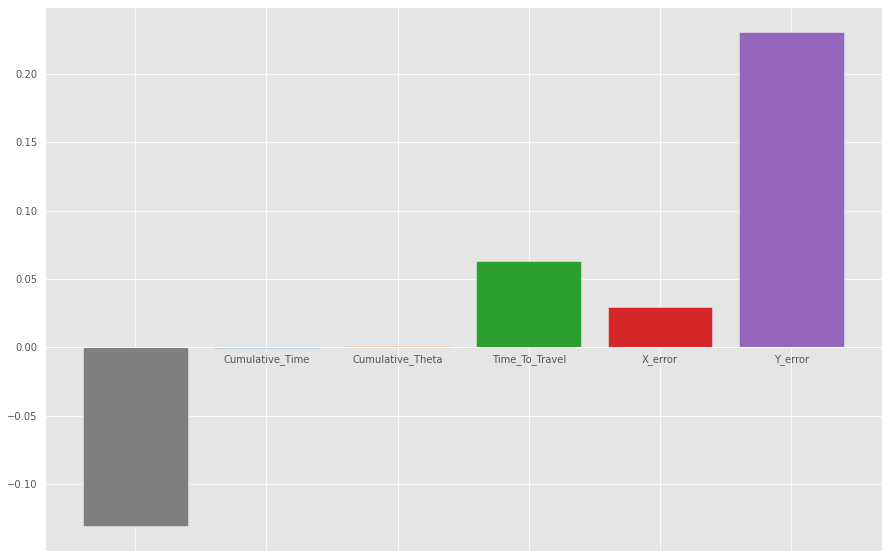

In [44]:
#plotting the coefficient score
fig, ax = plt.subplots(figsize=(15,10))
color =['tab:gray','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown',  
        'tab:pink','tab:gray','tab:olive','tab:cyan','tab:orange','tab:green','tab:blue','tab:olive'] 

ax.bar(lreg_coef["Columns"],  
lreg_coef['Coefficient Estimate'],  
color = color) 
ax.spines['bottom'].set_position('zero') 
ax.axes.xaxis.set_ticklabels(lreg_coef["Columns"])
plt.style.use('ggplot') 
plt.show()

In [20]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

In [21]:
##Calculating the Mean-Squared Error(MSE):
mse1 = np.mean((y_pred1 - y_test)**2)
print("Mean Squared Error: ", mse1)

Mean Squared Error:  0.09692860304054554


In [22]:
"""putting together the coefficient and their corresponding variable names"""
lasso_coef = pd.DataFrame()
lasso_coef['Columns'] = x_train.columns
lasso_coef['Coefficient Estimate'] = pd.Series(lasso.coef_)
print(lasso_coef)

            Columns  Coefficient Estimate
0          Velocity             -0.000000
1   Cumulative_Time              0.000019
2  Cumulative_Theta             -0.000188
3    Time_To_Travel              0.000000
4           X_error              0.000000
5           Y_error              0.000000


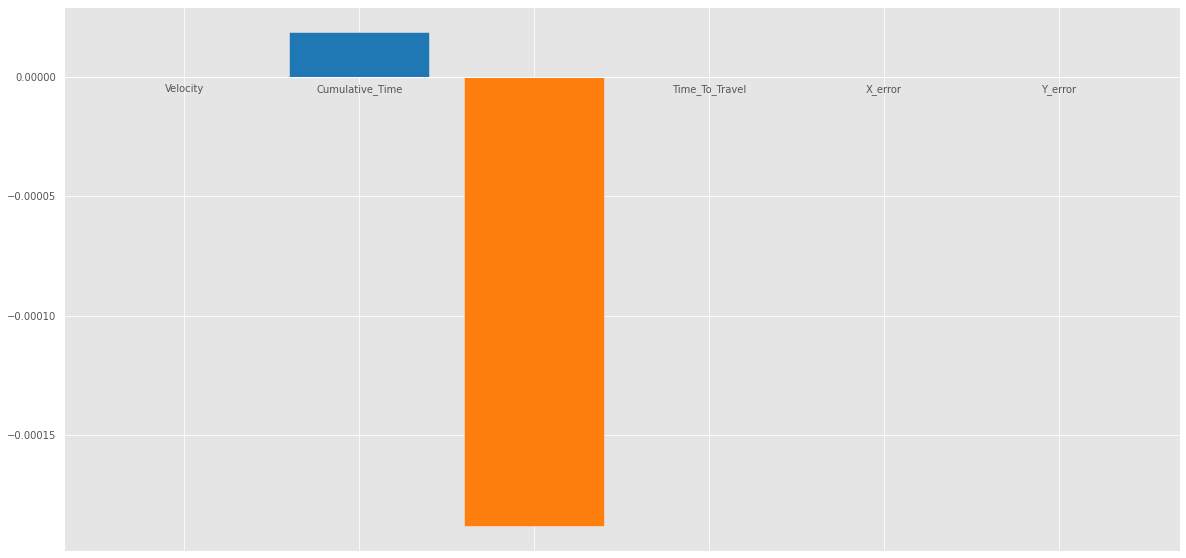

In [26]:
#plotting the coefficient score
fig, ax = plt.subplots(figsize=(20,10))
color =['tab:gray','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown',  
        'tab:pink','tab:gray','tab:olive','tab:cyan','tab:orange','tab:green','tab:blue','tab:olive'] 

ax.bar(lasso_coef["Columns"],  
lasso_coef['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 

In [27]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train, y_train)
y_pred2 = ridge.predict(x_test)


In [28]:
# Calculating the Mean Squared Error
mse2 = np.mean((y_pred2 - y_test)**2)
print("Mean Square Error:", mse2)


Mean Square Error: 0.08752762944533042


In [29]:
"""putting together the coefficient and their corresponding variable names"""
ridge_coef = pd.DataFrame()
ridge_coef['Columns'] = x_train.columns
ridge_coef['Coefficient Estimate'] = pd.Series(ridge.coef_)
print(ridge_coef)

            Columns  Coefficient Estimate
0          Velocity             -0.153591
1   Cumulative_Time             -0.000104
2  Cumulative_Theta              0.000448
3    Time_To_Travel              0.040584
4           X_error              0.029350
5           Y_error              0.131454


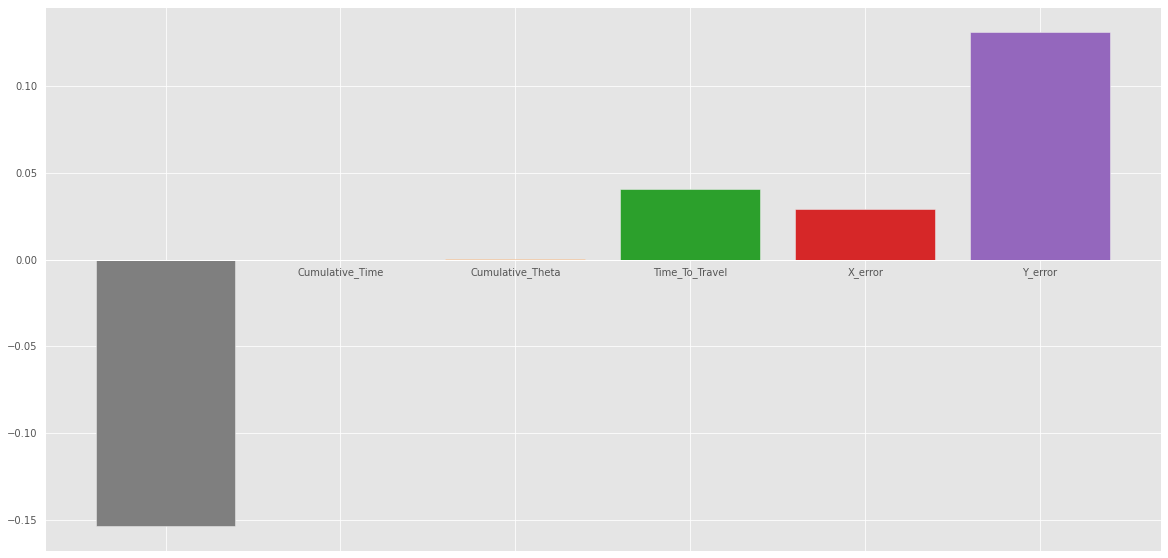

In [30]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize=(20,10))
color =['tab:gray','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown',  
        'tab:pink','tab:gray','tab:olive','tab:cyan','tab:orange','tab:green','tab:blue','tab:olive'] 

ax.bar(ridge_coef["Columns"],  
ridge_coef['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 

In [34]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet()
enet.fit(x_test, y_test)
y_pred3 = enet.predict(x_test)

In [35]:
#Calculating0 the Mean Squared Error
mse3 = np.mean((y_pred3 - y_test)**2)
print("Mean Squared Error:", mse3)

Mean Squared Error: 0.09619215825004913


In [36]:
"""putting together the coefficient and their corresponding variable names"""
enet_coef = pd.DataFrame()
enet_coef['Columns'] = x_train.columns
enet_coef['Coefficient Estimate'] = pd.Series(enet.coef_)
print(enet_coef)

            Columns  Coefficient Estimate
0          Velocity             -0.000000
1   Cumulative_Time              0.000003
2  Cumulative_Theta             -0.000346
3    Time_To_Travel              0.000000
4           X_error              0.000000
5           Y_error              0.000000


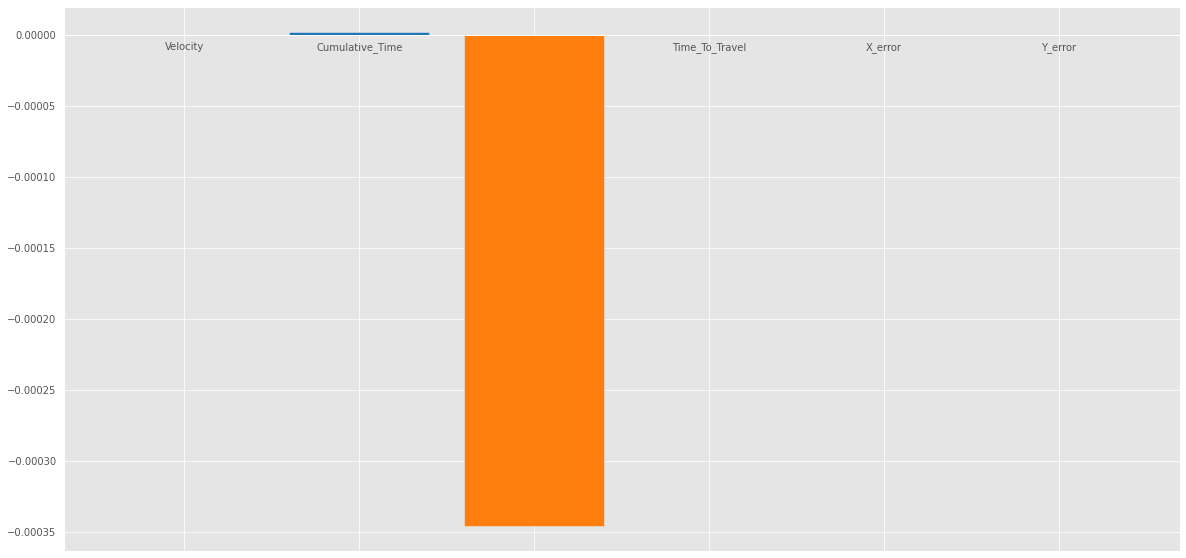

In [37]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize=(20,10))
color =['tab:gray','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown',  
        'tab:pink','tab:gray','tab:olive','tab:cyan','tab:orange','tab:green','tab:blue','tab:olive'] 

ax.bar(enet_coef["Columns"],  
enet_coef['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 


In [89]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [91]:
#Setting the value for X and Y
x = data[['Cumulative_Theta']]
y = data['Distance_travelled_error']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)


In [92]:
slr= LinearRegression()  
slr.fit(x_train, y_train)

#Printing the model coefficients
print('Intercept: ', slr.intercept_)
print('Coefficient:', slr.coef_)

Intercept:  0.9587294584651253
Coefficient: [-0.00856496]


In [93]:
print('Regression Equation: Distance_travelled_error = 1.4208392892091353 + 0.00622844 * Cumulative_Theta')

Regression Equation: Distance_travelled_error = 1.4208392892091353 + 0.00622844 * Cumulative_Theta


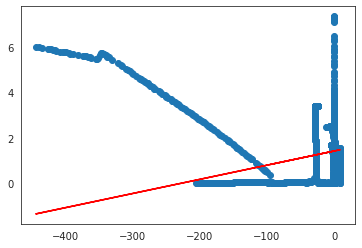

In [94]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 1.4208392892091353 + 0.00622844 * x_train, 'r')
plt.show()

In [95]:
y_pred_slr= slr.predict(x_test)  
x_pred_slr= slr.predict(x_train)

In [96]:
print("Prediction for test set: {}".format(y_pred_slr))
#Actual value and the predicted value
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_slr})
slr_diff

Prediction for test set: [0.95872946 0.92414016 0.95952517 ... 0.95387397 0.99557599 0.96751481]


,Actual value,Predicted value
2486,0.697818,0.958729
3727,0.082497,0.924140
2110,0.018352,0.959525
3312,0.226662,0.956164
2822,2.042135,0.958729
...,...,...
1171,3.395776,1.163732
3498,0.009855,0.880668
3633,0.013609,0.953874
1833,1.676013,0.995576


In [97]:
from sklearn.metrics import accuracy_score
print('R squared value of the model: {:.2f}'.format(slr.score(x,y)*100))

R squared value of the model: 16.09


In [98]:

# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_slr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_slr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 1.1099352973934415
Mean Square Error: 2.003919180408797
Root Mean Square Error: 1.4155985237378559


In [99]:
x = data[['Velocity', 'Cumulative_Time']]
y = data['X_error']
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=100)


In [100]:

mlr= LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [101]:
#Printing the model coefficients
print(mlr.intercept_)
# pair the feature names with the coefficients
list(zip(x, mlr.coef_))

0.5798612463306801


[('Velocity', -0.15455175649146904),
 ('Cumulative_Time', 0.00019336266088628072)]

In [102]:
y_pred_mlr= mlr.predict(x_test)  
x_pred_mlr= mlr.predict(x_train)
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [0.67953363 0.56247197 0.73618363 ... 0.52799503 1.2364361  0.66395266]


In [103]:

#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff

,Actual value,Predicted value
2486,0.964970,0.679534
3727,0.806493,0.562472
2110,0.370508,0.736184
3312,0.260902,0.554261
2822,0.484026,0.664511
...,...,...
1171,1.273923,1.345163
3498,0.614347,0.756257
3633,0.102602,0.527995
1833,0.313243,1.236436


In [104]:

# print the R-squared value for the model
print('R squared value of the model: {:.2f}'.format(mlr.score(x,y)*100))

R squared value of the model: 9.31


In [105]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.4874637813112133
Mean Square Error: 0.40802825842066714
Root Mean Square Error: 0.6387708966606628


In [106]:

# define dataset
X=data[['Theta'	,'Velocity',	'Cumulative_Time',	'Cumulative_Theta','Surface_Type'	,'X_error','Y_error']]
model=LogisticRegression(random_state=1)
# define the model
features=pd.get_dummies(data[['Theta'	,'Velocity',	'Cumulative_Time',	'Cumulative_Theta','X_error','Y_error','Surface_Type']])
model = LogisticRegression(random_state=1)
model.fit(features,data['Label'])
feature_importance=pd.DataFrame({'feature':list(features.columns),'feature_importance':[(i) for i in model.coef_[0]]})
feature_importance.sort_values('feature_importance')
feature_importance


,feature,feature_importance
0,Theta,0.008303
1,Velocity,-1.969736
2,Cumulative_Time,0.000017
3,Cumulative_Theta,-0.010873
4,X_error,0.596307
5,Y_error,-0.072793
6,Surface_Type_CARPET,0.836130


In [31]:
model=RandomForestClassifier()
 
model.fit(features,data['Label'])
 
feature_importances=pd.DataFrame({'features':features.columns,'feature_importance':model.feature_importances_})
feature_importances.sort_values('feature_importance')

,features,feature_importance
6,Surface_Type_CARPET,0.010912
7,Surface_Type_TILE,0.011625
0,Theta,0.026159
3,Cumulative_Theta,0.053412
1,Velocity,0.197355
4,X_error,0.214880
2,Cumulative_Time,0.231922
5,Y_error,0.253736


In [11]:
model=smf.logit('Label~Theta+Velocity+Cumulative_Time+Cumulative_Theta+Surface_Type',data=data)
result = model.fit()
 
feature_importances=pd.DataFrame(result.conf_int()[1]).rename(columns={1:'Coefficients'}).eval("absolute_coefficients=abs(Coefficients)")
feature_importances.sort_values('absolute_coefficients',ascending=False).drop('Intercept')[['absolute_coefficients']]


Optimization terminated successfully.
         Current function value: 0.531569
         Iterations 6


,absolute_coefficients
Surface_Type[T.TILE],0.351040
Velocity,0.231863
Theta,0.183890
Cumulative_Time,0.000417
Cumulative_Theta,0.000186


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
data

,Series_ID,Theta,Velocity,Cumulative_Time,Cumulative_Theta,Distance_travelled_error,Surface_Type,X_error,Y_error,Label
0,0.0,0.000000e+00,0.25,0.545720,0.000000e+00,0.012151,TILE,0.012141,0.000021,1
1,0.0,0.000000e+00,0.25,1.141841,0.000000e+00,0.012384,TILE,0.012228,0.000021,1
2,0.0,0.000000e+00,0.25,1.787944,0.000000e+00,0.013017,TILE,0.012441,0.000022,1
3,0.0,0.000000e+00,0.25,2.484894,0.000000e+00,0.018518,TILE,0.012168,0.000025,1
4,0.0,0.000000e+00,0.25,3.218403,0.000000e+00,0.021477,TILE,0.008079,0.000028,1
...,...,...,...,...,...,...,...,...,...,...
13313,61.0,-2.449294e-16,0.30,746.610621,-3.477997e-14,0.035410,CARPET,0.666759,0.003800,1
13314,61.0,-2.449294e-16,0.30,756.146195,-3.502490e-14,0.035323,CARPET,0.662488,0.003793,1
13315,61.0,-2.449294e-16,0.30,765.731923,-3.526983e-14,0.035381,CARPET,0.656178,0.003784,1
13316,61.0,-2.449294e-16,0.30,775.367627,-3.551476e-14,0.035381,CARPET,0.649981,0.003774,1


In [13]:
X=data[['Theta','Velocity','Cumulative_Time','Cumulative_Theta','X_error','Y_error']]
Y=data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)


In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

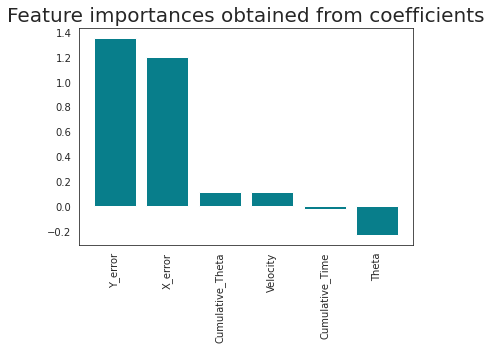

In [15]:

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [16]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

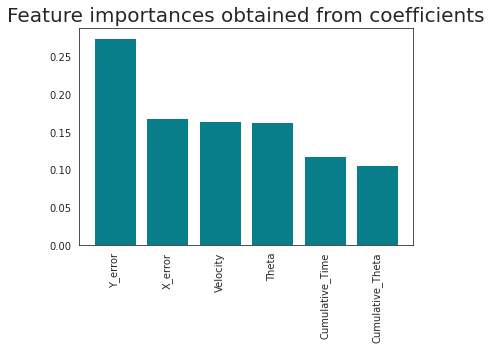

In [17]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [107]:
from sklearn.decomposition import PCA

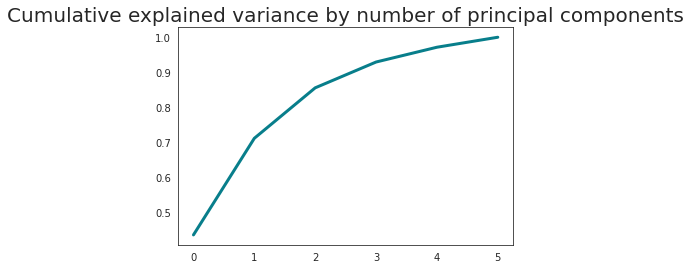

In [108]:
pca = PCA().fit(X_train_scaled)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()


In [109]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)],
    index=X_train.columns
)

In [110]:
loadings.head()


,PC1,PC2,PC3,PC4,PC5,PC6
Theta,0.522311,-0.765349,-0.088462,0.061441,0.350458,0.084327
Velocity,-0.435974,0.188910,-0.877834,-0.008752,0.050595,0.033334
Cumulative_Time,0.736163,0.431892,-0.104403,0.487887,0.033003,-0.147005
Cumulative_Theta,0.526954,-0.737558,-0.255240,-0.096044,-0.268843,-0.178267
X_error,0.908002,0.209632,-0.102114,-0.040054,-0.172373,0.299905


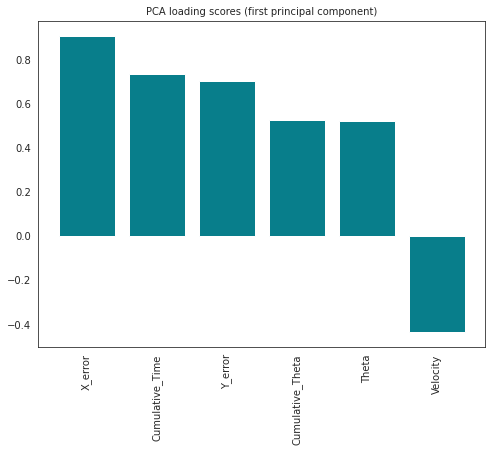

In [111]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']
plt.figure(figsize=(8,6))
plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=10)
plt.xticks(rotation='vertical')
plt.show()


In [23]:
data1=data.copy(deep=True)
data1=data1.drop(['Distance_travelled_error','X_error','Y_error'],axis=1)
data1

,Series_ID,Theta,Velocity,Cumulative_Time,Cumulative_Theta,Surface_Type,Label
0,0.0,0.000000e+00,0.25,0.545720,0.000000e+00,TILE,1
1,0.0,0.000000e+00,0.25,1.141841,0.000000e+00,TILE,1
2,0.0,0.000000e+00,0.25,1.787944,0.000000e+00,TILE,1
3,0.0,0.000000e+00,0.25,2.484894,0.000000e+00,TILE,1
4,0.0,0.000000e+00,0.25,3.218403,0.000000e+00,TILE,1
...,...,...,...,...,...,...,...
13313,61.0,-2.449294e-16,0.30,746.610621,-3.477997e-14,CARPET,1
13314,61.0,-2.449294e-16,0.30,756.146195,-3.502490e-14,CARPET,1
13315,61.0,-2.449294e-16,0.30,765.731923,-3.526983e-14,CARPET,1
13316,61.0,-2.449294e-16,0.30,775.367627,-3.551476e-14,CARPET,1


In [24]:
array=data1.values
x=array[:,0:5]
y=array[:,5]
y

array(['TILE', 'TILE', 'TILE', ..., 'CARPET', 'CARPET', 'CARPET'],
      dtype=object)

In [25]:
from sklearn.feature_selection import RFE

model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(x, y)
print("Num Features: %d"% fit.n_features_)
print("Selected Features: %s"% fit.support_) 
print("Feature Ranking: %s"% fit.ranking_)


TypeError: ignored

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance

# Train a basic logit model on this simple data,
# replace this with your model
clf = LogisticRegression().fit(x, y)
# Here's how you use permutation importance
result = permutation_importance(clf, x, y, n_repeats=10,
                                random_state=0)
print('Permutation importance scores', result.importances)

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [46]:

df = mobile_robot_data[['X_ODOM','Y_ODOM','X_GR','Y_GR','Theta','Velocity','Cumulative_Time','Cumulative_Theta','Distance_travelled_error']]
nbrs = NearestNeighbors(n_neighbors = 10)
# fit model
nbrs.fit(df)


NearestNeighbors(n_neighbors=10)

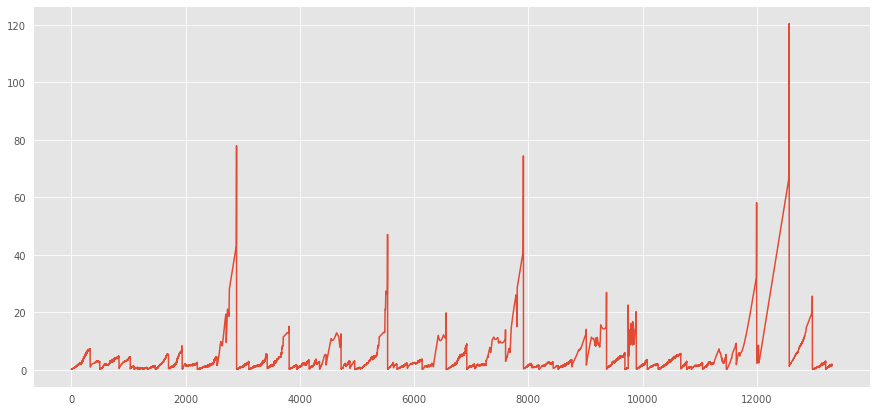

In [47]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(df)
# plot
plt.figure(figsize=(15, 7))
plt.plot(distances.mean(axis =1))

In [48]:
distances = pd.DataFrame(distances)
distances_mean = distances.mean(axis =1)
distances_mean

0        0.144300
1        0.116498
2        0.148449
3        0.205615
4        0.135955
           ...   
13313    1.643437
13314    1.497890
13315    1.914529
13316    1.441655
13317    1.423706
Length: 13318, dtype: float64

In [49]:
distances_mean.describe()

count    13318.000000
mean         5.972423
std          9.568980
min          0.080383
25%          1.202961
50%          2.274183
75%          6.307542
max        120.418914
dtype: float64

In [50]:
th = 9.0
outlier_index = np.where(distances_mean > th)
outlier_index


(array([ 2611,  2612,  2613, ..., 12968, 12969, 12970]),)

In [51]:
outlier_values = df.iloc[outlier_index]
outlier_values

,X_ODOM,Y_ODOM,X_GR,Y_GR,Theta,Velocity,Cumulative_Time,Cumulative_Theta,Distance_travelled_error
2611,0.643,-0.499,0.640848,-0.236214,-1.221730,0.1,119.103522,-75.625116,0.029881
2612,0.646,-0.508,0.643223,-0.239374,-1.221730,0.1,122.574084,-76.846847,0.033199
2613,0.650,-0.517,0.647912,-0.245611,-1.221730,0.1,126.111342,-78.068577,0.029372
2614,0.653,-0.527,0.651358,-0.250195,-1.221730,0.1,129.698658,-79.290308,0.024151
2615,0.657,-0.536,0.654755,-0.254714,-1.221730,0.1,133.336097,-80.512038,0.019657
...,...,...,...,...,...,...,...,...,...
12966,13.081,-0.387,0.617533,-0.022429,-0.017453,0.5,3651.453336,-15.236724,12.164841
12967,13.131,-0.389,0.618052,-0.022448,-0.017453,0.5,3663.966327,-15.254178,11.921902
12968,13.178,-0.390,0.619589,-0.022503,-0.034907,0.5,3676.525408,-15.289084,12.117725
12969,13.227,-0.392,0.620056,-0.022520,-0.034907,0.5,3689.107577,-15.323991,12.333996


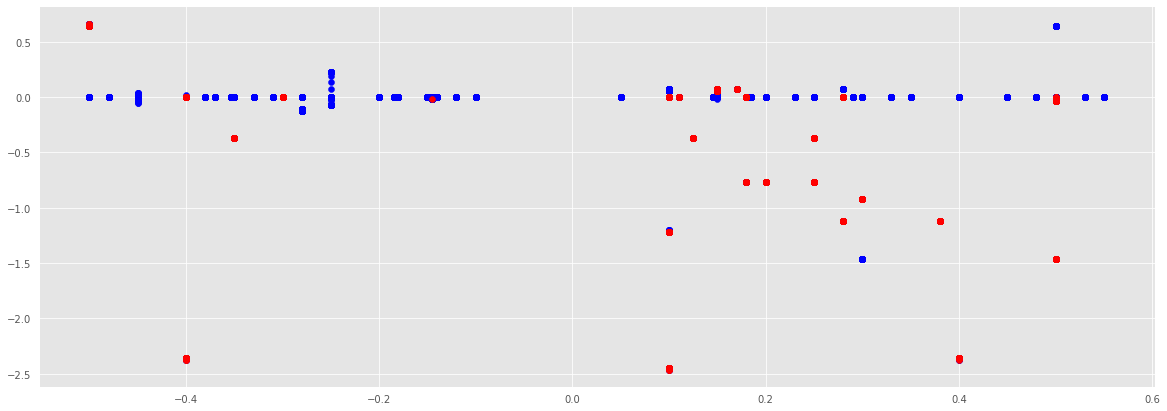

In [52]:
plt.figure(figsize=(20, 7))
plt.scatter(df["Velocity"], df["Theta"], color = "b")
# plot outlier values
plt.scatter(outlier_values["Velocity"], outlier_values["Theta"], color = "r")

Text(0, 0.5, 'Distance_travelled_error')

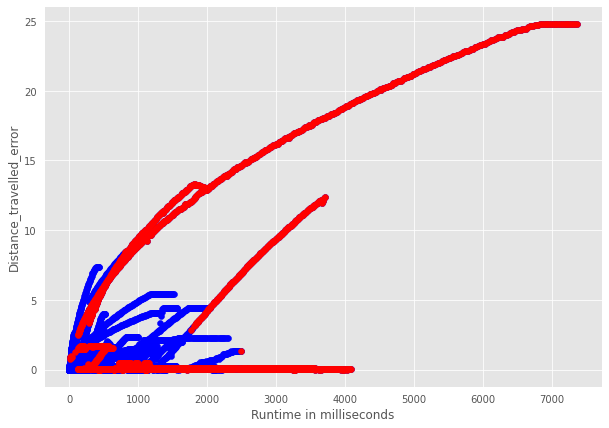

In [53]:
plt.figure(figsize=(10, 7))
plt.scatter(df["Cumulative_Time"], df["Distance_travelled_error"], color = "b")
# plot outlier values
plt.scatter(outlier_values["Cumulative_Time"], outlier_values["Distance_travelled_error"], color = "r")
plt.xlabel("Runtime in milliseconds")
plt.ylabel("Distance_travelled_error")

In [54]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X=mobile_robot_data[['Theta']]
Y=mobile_robot_data[['Distance_travelled_error']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [55]:
slr= LinearRegression()  
slr.fit(x_train, y_train)

LinearRegression()

In [56]:

#Printing the model coefficients
print('Intercept: ', slr.intercept_)
print('Coefficient:', slr.coef_)

Intercept:  [1.37390088]
Coefficient: [[0.86386134]]


In [57]:
slr.intercept_[0]
slr.coef_[0][0]
print('Regression Equation: Sales = '+str(slr.intercept_[0])+'+'+  str(slr.coef_[0][0]) +'* Theta')

Regression Equation: Sales = 1.3739008824165366+0.8638613388306439* Theta


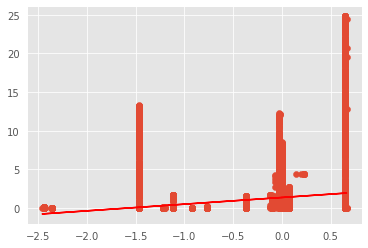

In [58]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 1.3739008824165366 + 0.86386133*x_train, 'r')
plt.show()

In [59]:
#Prediction of Test and Training set result  
y_pred_slr= slr.predict(x_test)  
x_pred_slr= slr.predict(x_train)

In [ ]:
print("Prediction for test set: {}".format(y_pred_slr))


In [ ]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()  
mlr.fit(x_train, y_train)

In [ ]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

In [ ]:
y_pred_mlr= mlr.predict(x_test)
print("Prediction for test set: {}".format(y_pred_mlr))
 